#Import Library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [ ]:
#df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/application_train.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Data Analytics Zenius/Final Project/application_train.csv')
print('Home Credit Default Risk Dataset has %d rows and %d columns.\n' % df_train.shape)
df_train.head()

Home Credit Default Risk Dataset has 307511 rows and 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
home = df_train.copy()

#Data Cleaning

**Mendeteksi dan Menghapus Data Duplikat**

In [ ]:
home.duplicated().sum()

0

**Mendeteksi Missing Value**

In [ ]:
count_null = home.isnull().sum().reset_index()
count_null = count_null[count_null[0] != 0].sort_values(by=0, ascending=False).reset_index(drop=True)
count_null.columns = ["Variable", "Missing Value"]
count_null["Percentage"] = (count_null["Missing Value"] / len(home) * 100)
count_null

,Variable,Missing Value,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,68.354953
9,LIVINGAPARTMENTS_AVG,210199,68.354953


**Menangani Missing Value**

Feature yang mengandung missing value >40% kemudian akan dihapus, sedangkan feature yang missing value nya <40% akan ditangani dengan inputasi nilai median pada feature numerik dan inputasi nilai modus pada feature kategorik.

In [ ]:
data = list(count_null[count_null['Percentage'] > 40]['Variable'])
home = home.drop(columns = data)
home = home.drop(columns = 'SK_ID_CURR')

In [ ]:
count_null = home.isnull().sum().reset_index()
count_null.columns = ["Variable", "Missing Value"]
count_null['Percentage'] = (count_null['Missing Value'] / len(home) ) * 100
still_null = count_null[count_null['Percentage'] != 0].sort_values(by='Percentage', ascending=False).reset_index(drop=True)
still_null

,Variable,Missing Value,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [ ]:
h = list(still_null['Variable'])
home[h].dtypes

for i in h:
    data = home[i]
    types = str(data.dtype)
    if types == 'object':
        home[i].fillna(home[i].mode()[0], inplace=True)
    else:
        home[i].fillna(home[i].median(), inplace=True)

In [ ]:
count_null = pd.DataFrame(home.isnull().sum(), columns=["Missing Value"]).reset_index()
count_null['Percentage'] = ( count_null['Missing Value'] / len(home) ) * 100
count_null[count_null['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

,index,Missing Value,Percentage


**Menghapus Value XNA**

In [ ]:
home['CODE_GENDER'] = home['CODE_GENDER'].replace(['XNA'], home['CODE_GENDER'].mode()[0])
home['ORGANIZATION_TYPE'] = home['ORGANIZATION_TYPE'].replace(['XNA'], home['ORGANIZATION_TYPE'].mode()[0])

**Menghapus Semua Kolom FLAG_DOCUMENT**

In [ ]:
FLAG_DOCUMENT = [col for col in home.columns if 'FLAG_DOCUMENT' in col]
home.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

#Feature Engineering

In [ ]:
x = home.drop(columns = 'TARGET')
x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cats = [i for i in x.columns if x[i].dtypes == 'object']
nums = [i for i in x.columns if x[i].dtypes != 'object']

##Numeric Data Type

In [ ]:
numerik = x[nums]

**Mengubah Nilai Negatif di Semua Kolom Menjadi Nilai Positif**

In [ ]:
# negative_column = numerik.columns[(numerik < 0).any()].tolist()
# numerik[negative_column] = numerik[negative_column] * -1
# numerik.head()

#numerik.iloc[:,6:9] = numerik.iloc[:,6:9].abs()
#numerik.iloc[:,31] = numerik.iloc[:,31].abs()
numerik = numerik.abs()
numerik.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
numerik.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.0

In [ ]:
home_num = pd.DataFrame(numerik.nunique(), columns = ['Total_unique']).reset_index()
home_num = home_num.rename(columns = {'index' : 'Name_of_column'})

nums_a = []
nums_b = []
for i,y in enumerate(home_num.Name_of_column):
    if home_num['Total_unique'][i] > 2:
        nums_a.append(y)
    else:
        nums_b.append(y)

**Distribusi Data**

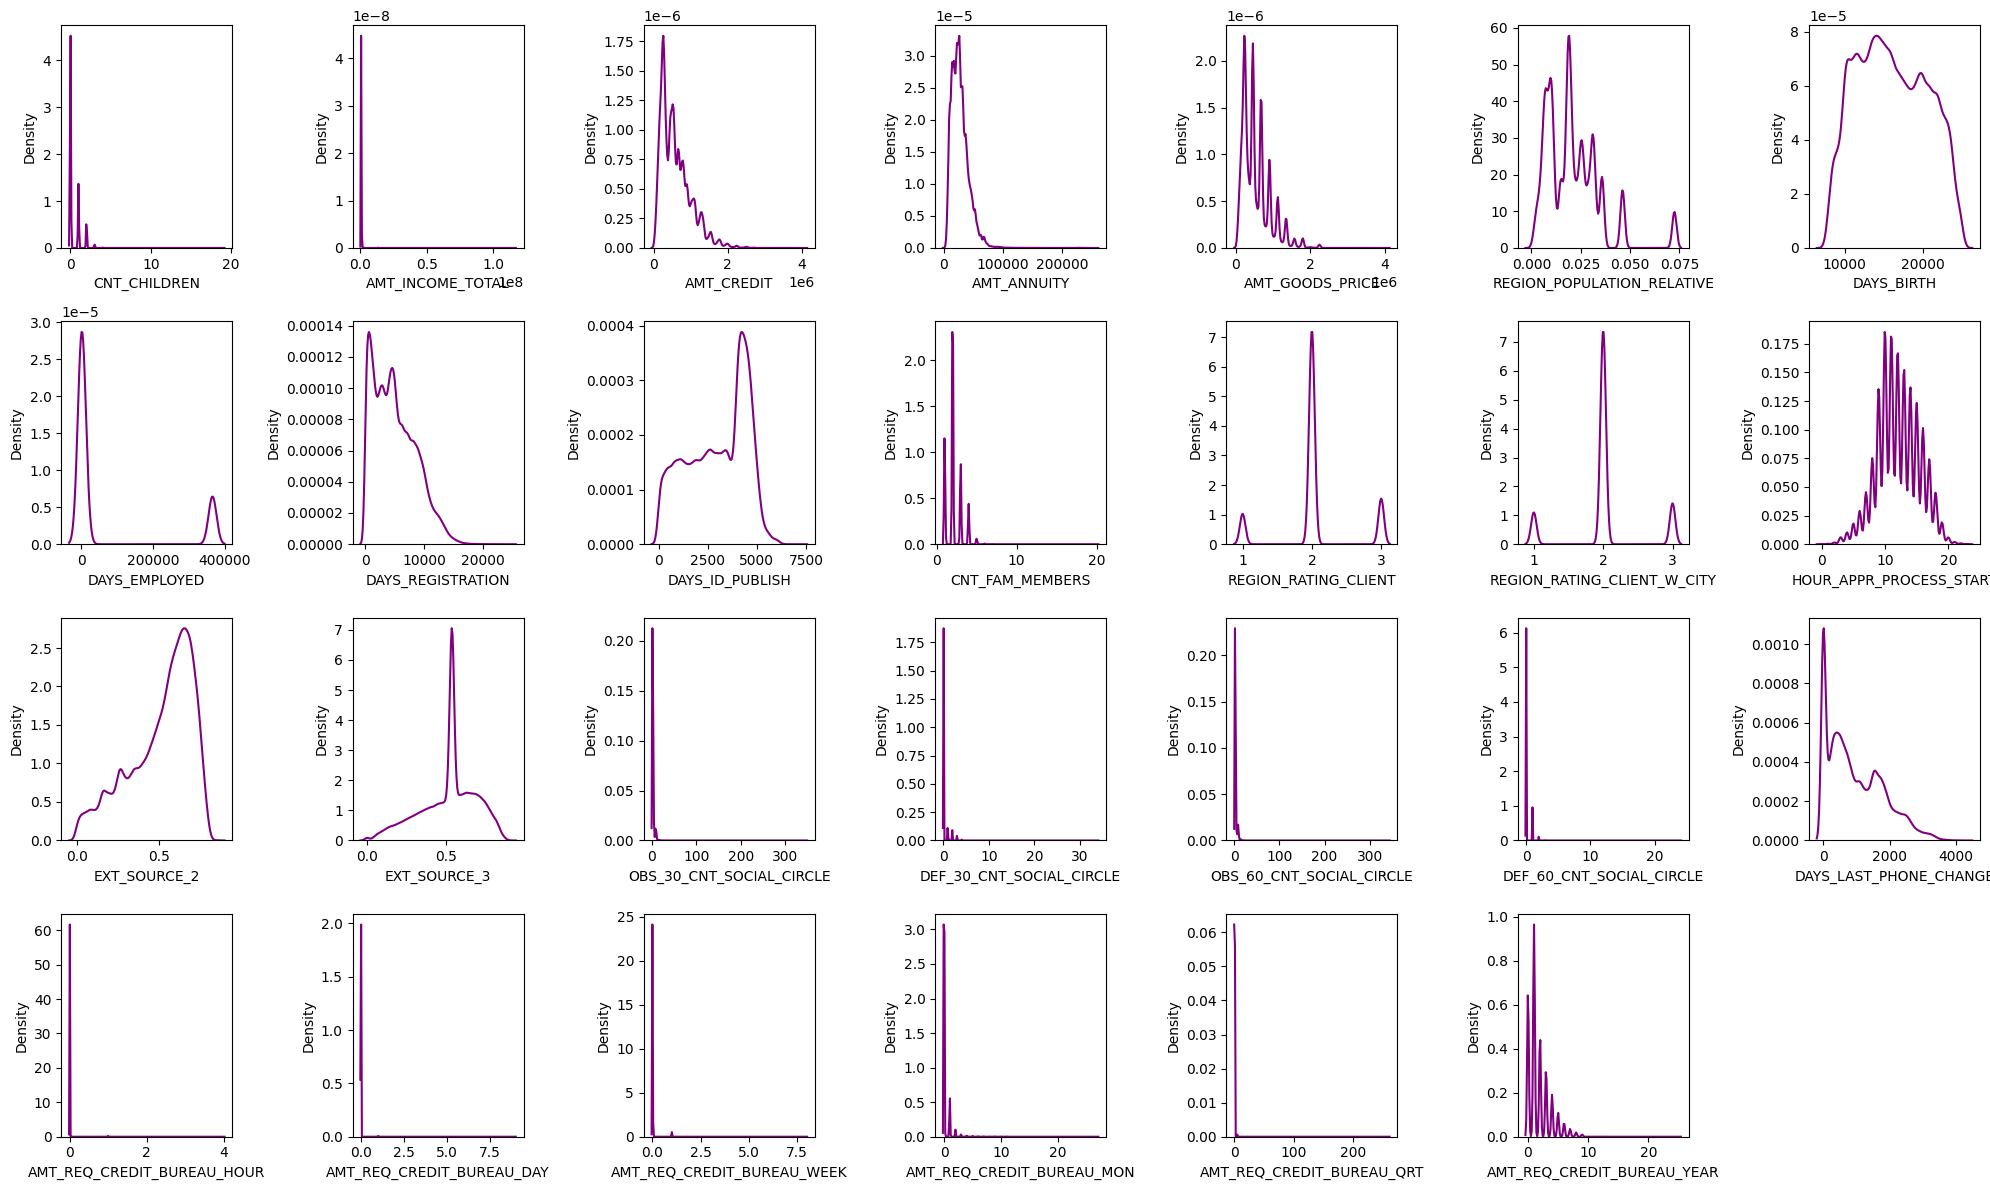

In [ ]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(numerik[nums_a].columns, 1):
    plt.subplot(4, 7, i)
    sns.kdeplot(data=numerik[nums_a], x=col, color='purple')
    plt.tight_layout()
plt.show()

Secara keseluruhan, data numerik tidak mendekati distribusi normal sehingga perlu dilakukan normalisasi.

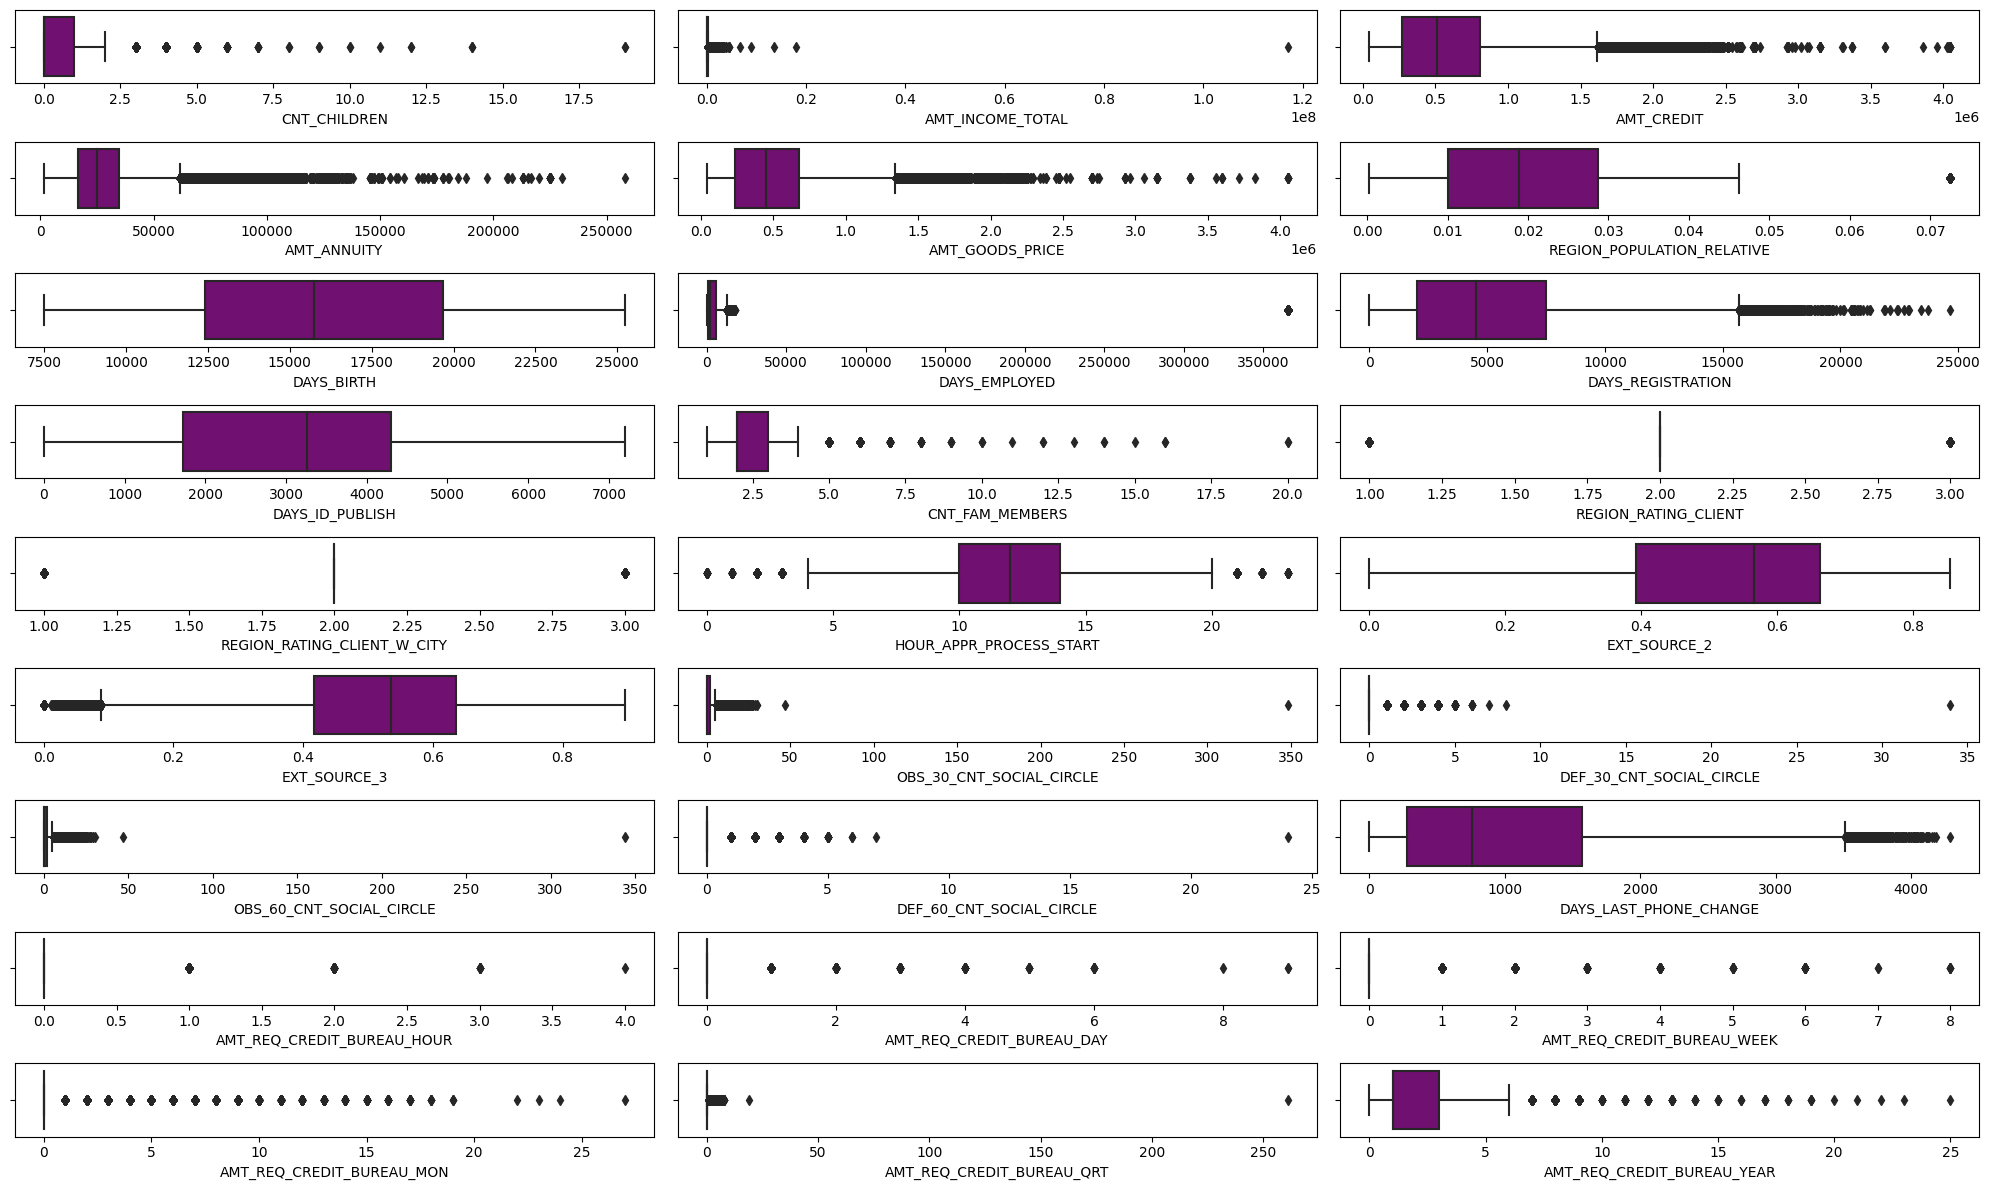

In [ ]:
plt.figure(figsize=(20,12))

for i, col in enumerate(numerik[nums_a].columns, 1):
    plt.subplot(9,3,i)
    sns.boxplot(data=numerik[nums_a], x=numerik[col], color='purple')
    plt.tight_layout()

Kolom CNT_CHILDREN adalah kolom abnormal sehingga perlu dilakukan penanganan terhadap outlier.

**Menangani Outlier**

In [ ]:
#Output tulisannya sebaiknya diubah
print(f'Row before delete outlier at CNT_children :  {len(home)}')

filtered_entries = np.array([True] * len(home))

zscore = abs(stats.zscore(home['CNT_CHILDREN'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

home = home[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children : {len(home)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


**Export Data for Dashboard**

In [ ]:
#home.shape

In [ ]:
#numerik = numerik[nums_a]
#numerik.head()

In [ ]:
#home_new = pd.concat([numerik, home[cats], home['TARGET']], axis=1)
#home_new.shape

In [ ]:
#home_new.head()

In [ ]:
#home_new.to_csv('df_clean_fix.csv', index=False)

**Transformasi**

In [ ]:
x = home.drop(columns = 'TARGET', axis=1)
numerik = x[nums_a]

In [ ]:
nums_mean = numerik.mean()
nums_std = numerik.std()

numerik = (numerik - nums_mean) / nums_std
numerik.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,1.509510,-0.459710,0.385831,0.577304,-1.320962,-0.101497,-0.061058,-0.632857,-1.320400,-2.155754,0.243323,4.164731,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.158701,-0.463592,1.083617,1.789288,-0.131831,-2.066499,-2.051288,-0.326703,0.562965,0.110575,-0.173588,-0.320453,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.679674,-0.456807,0.212377,0.304955,-1.320962,-0.101497,-0.061058,-0.939011,0.215257,1.222789,-0.590499,-0.320453,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.670310,-0.476632,-1.367137,0.367244,-0.131831,-0.101497,-0.061058,1.510219,0.710763,0.110575,0.243323,-0.320453,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.882034,-0.476625,0.197922,-0.309320,-1.320962,-0.101497,-0.061058,-0.326703,-1.006994,0.110575,-0.590499,-0.320453,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106


In [ ]:
nums_new = x[nums_b]
nums_new = nums_new.loc[~nums_new.index.duplicated(keep='first')]

numerik = pd.concat([numerik, nums_new], axis=1)
numerik.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,1.509510,-0.459710,0.385831,0.577304,-1.320962,-0.101497,-0.061058,-0.632857,-1.320400,-2.155754,0.243323,4.164731,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,1,1,0,1,1,0,0,0,0,0,0,0
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.158701,-0.463592,1.083617,1.789288,-0.131831,-2.066499,-2.051288,-0.326703,0.562965,0.110575,-0.173588,-0.320453,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,1,1,0,1,1,0,0,0,0,0,0,0
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.679674,-0.456807,0.212377,0.304955,-1.320962,-0.101497,-0.061058,-0.939011,0.215257,1.222789,-0.590499,-0.320453,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,1,1,1,1,1,0,0,0,0,0,0,0
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.670310,-0.476632,-1.367137,0.367244,-0.131831,-0.101497,-0.061058,1.510219,0.710763,0.110575,0.243323,-0.320453,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,1,1,0,1,0,0,0,0,0,0,0,0
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.882034,-0.476625,0.197922,-0.309320,-1.320962,-0.101497,-0.061058,-0.326703,-1.006994,0.110575,-0.590499,-0.320453,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,1,1,0,1,0,0,0,0,0,0,1,1


##Object Data Type

In [ ]:
#obj = x.select_dtypes(include='object')
obj = home[cats]
home_cats = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
home_cats = home_cats.rename(columns = {'index' : 'Name_of_column'})

cats_1 = []
cats_2 = []
for i,y in enumerate(home_cats.Name_of_column):
    if home_cats['Total_unique'][i] > 2:
        cats_1.append(y)
    else:
        cats_2.append(y)
obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


**Categorical Encoding**

In [ ]:
for c in cats_1:
    onehots = pd.get_dummies(obj[c], prefix=c)
    obj = obj.join(onehots)

obj = obj.drop(columns = cats_1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for c in cats_2:
    obj[c] = label_encoder.fit_transform(obj[c])

obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [ ]:
df = pd.concat([numerik, obj], axis=1)

In [ ]:
df_full = pd.concat([df, home['TARGET']], axis=1)

#Data Splitting

In [ ]:
x = df_full.drop(columns ='TARGET')
y = df_full['TARGET']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

sm = SMOTE(random_state = 42)
x_over, y_over = sm.fit_resample(x_train, y_train)

(181943, 157) (181943,)
(121296, 157) (121296,)


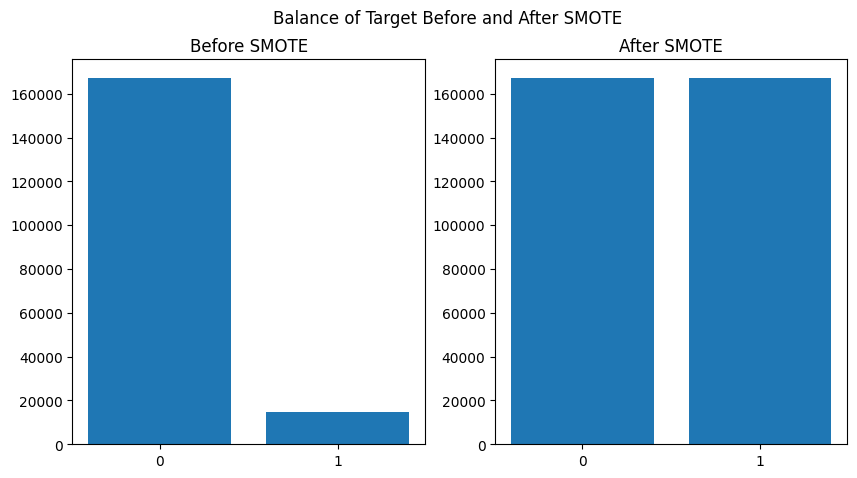

In [ ]:
# Menghitung jumlah kelas sebelum SMOTE
unique, counts = np.unique(y_train, return_counts=True)
target_counts_before = dict(zip(unique, counts))

# Menghitung jumlah kelas setelah SMOTE
unique, counts = np.unique(y_over, return_counts=True)
target_counts_after = dict(zip(unique, counts))

# Membuat chart
labels = ['0', '1']
sizes_before = [target_counts_before.get(0, 0), target_counts_before.get(1, 0)]
sizes_after = [target_counts_after.get(0, 0), target_counts_after.get(1, 0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Balance of Target Before and After SMOTE')

# Chart sebelum SMOTE
ax1.bar(labels, sizes_before)
ax1.set_title('Before SMOTE')

# Chart setelah SMOTE
ax2.bar(labels, sizes_after)
ax2.set_title('After SMOTE')

plt.show()


# Modelling

## Logistic Regression Model

In [ ]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    111512
           1       0.41      0.02      0.04      9784

    accuracy                           0.92    121296
   macro avg       0.66      0.51      0.50    121296
weighted avg       0.88      0.92      0.88    121296

ROC AUC: 0.7190895322244799


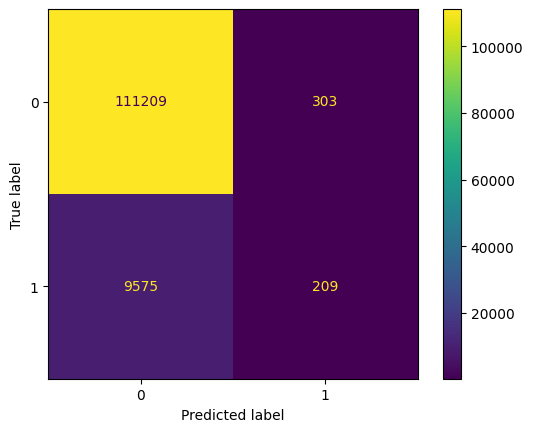

In [ ]:
lr1 = LogisticRegression(max_iter=2000)
lr1.fit(x_over, y_over)
predictions = lr1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

# Calculate ROC AUC
y_scores = lr1.predict_proba(x_test)[:, 1]  # Menggunakan probabilitas kelas positif
roc_auc_lr1 = roc_auc_score(y_test, y_scores)

# Print ROC AUC
print("ROC AUC:", roc_auc_lr1)

In [ ]:
# Perform cross-validation and calculate ROC AUC
cv_roc_auc_lr1 = cross_val_score(lr1, x, y, cv=5, scoring='roc_auc')

# Print cross-validated ROC AUC scores
print("Cross-Validated ROC AUC Scores:", cv_roc_auc_lr1)
print("Average Cross-Validated ROC AUC Scores: {:.2f}".format(np.mean(cv_roc_auc_lr1)))

Cross-Validated ROC AUC Scores: [0.73980628 0.74043704 0.73800476 0.74230201 0.74428416]
Average Cross-Validated ROC AUC Scores: 0.74


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    167331
           1       0.44      0.02      0.05     14612

    accuracy                           0.92    181943
   macro avg       0.68      0.51      0.50    181943
weighted avg       0.88      0.92      0.88    181943



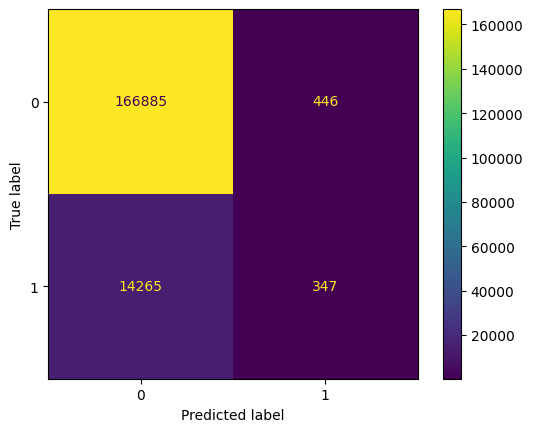

In [ ]:
predictions = lr1.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

## XGBoost Model

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    111512
           1       0.40      0.04      0.07      9784

    accuracy                           0.92    121296
   macro avg       0.66      0.52      0.51    121296
weighted avg       0.88      0.92      0.89    121296

ROC AUC: 0.7195711723797188


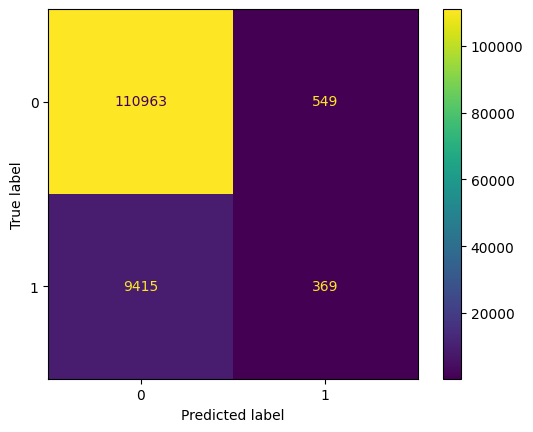

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_over, y_over)

predictions = xgb_model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

# Calculate ROC AUC
y_scores = xgb_model.predict_proba(x_test)[:, 1]  # Menggunakan probabilitas kelas positif
roc_auc_xgb = roc_auc_score(y_test, y_scores)

# Print ROC AUC
print("ROC AUC:", roc_auc_xgb)

In [ ]:
# Perform cross-validation and calculate ROC AUC
cv_roc_auc_xgb = cross_val_score(xgb_model, x, y, cv=5, scoring='roc_auc')

# Print cross-validated ROC AUC scores
print("Cross-Validated ROC AUC Scores:", cv_roc_auc_xgb)
print("Average Cross-Validated ROC AUC Scores: {:.2f}".format(np.mean(cv_roc_auc_xgb)))

Cross-Validated ROC AUC Scores: [0.74385408 0.74637859 0.73947971 0.74604294 0.74806696]
Average Cross-Validated ROC AUC Scores: 0.74


              precision    recall  f1-score   support

           0       0.93      1.00      0.96    167331
           1       0.74      0.08      0.14     14612

    accuracy                           0.92    181943
   macro avg       0.83      0.54      0.55    181943
weighted avg       0.91      0.92      0.89    181943



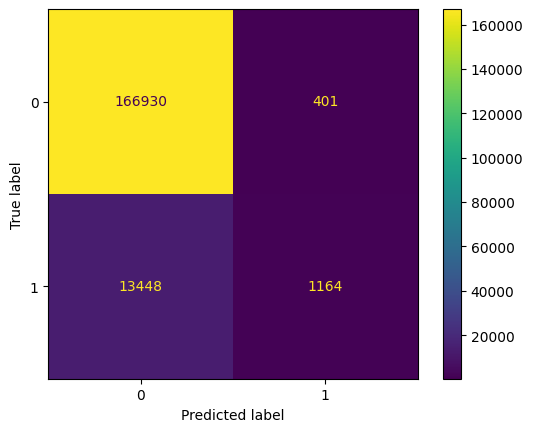

In [ ]:
predictions = xgb_model.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

## Random Forest

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    111512
           1       0.30      0.02      0.04      9784

    accuracy                           0.92    121296
   macro avg       0.61      0.51      0.50    121296
weighted avg       0.87      0.92      0.88    121296

ROC AUC: 0.6983541236346816


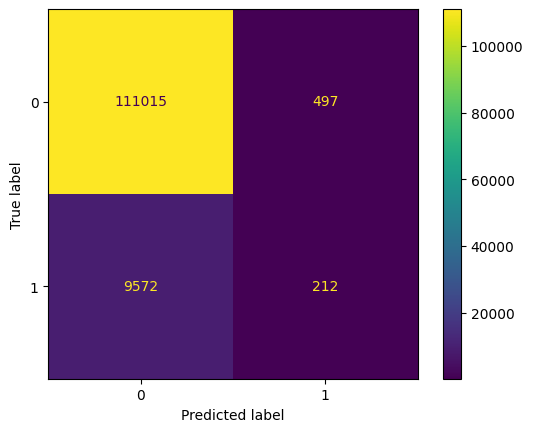

In [ ]:
rf_model = RandomForestClassifier().fit(x_over, y_over)
predictions = rf_model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

# Calculate ROC AUC
y_scores = rf_model.predict_proba(x_test)[:, 1]  # Menggunakan probabilitas kelas positif
roc_auc_rf = roc_auc_score(y_test, y_scores)

# Print ROC AUC
print("ROC AUC:", roc_auc_rf)

In [ ]:
# Perform cross-validation and calculate ROC AUC
cv_roc_auc_rf = cross_val_score(rf_model, x, y, cv=5, scoring='roc_auc')

# Print cross-validated ROC AUC scores
print("Cross-Validated ROC AUC Scores:", cv_roc_auc_rf)
print("Average Cross-Validated ROC AUC Scores: {:.2f}".format(np.mean(cv_roc_auc_rf)))

Cross-Validated ROC AUC Scores: [0.71500913 0.71676969 0.71318865 0.71150339 0.70935804]
Average Cross-Validated ROC AUC Scores: 0.71


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167331
           1       1.00      1.00      1.00     14612

    accuracy                           1.00    181943
   macro avg       1.00      1.00      1.00    181943
weighted avg       1.00      1.00      1.00    181943



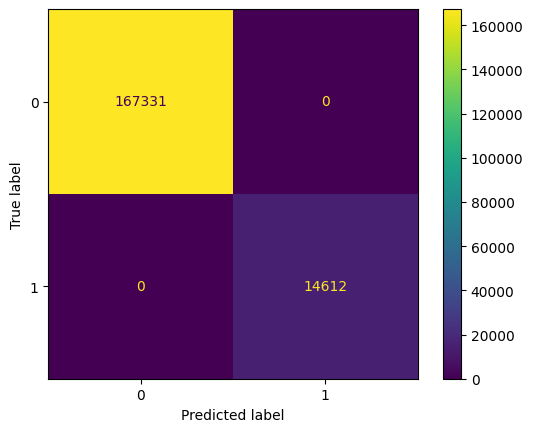

In [ ]:
predictions = rf_model.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

##Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.87      0.90    111512
           1       0.13      0.21      0.16      9784

    accuracy                           0.82    121296
   macro avg       0.53      0.54      0.53    121296
weighted avg       0.86      0.82      0.84    121296

ROC AUC: 0.5400696034415107


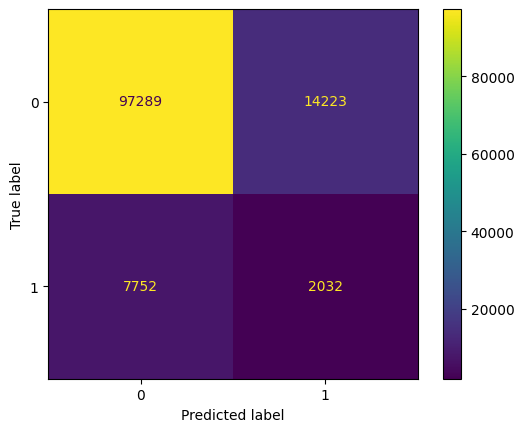

In [ ]:
dt_model = DecisionTreeClassifier().fit(x_over, y_over)
predictions = dt_model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

# Calculate ROC AUC
y_scores = dt_model.predict_proba(x_test)[:, 1]  # Menggunakan probabilitas kelas positif
roc_auc_dt = roc_auc_score(y_test, y_scores)

# Print ROC AUC
print("ROC AUC:", roc_auc_dt)

In [ ]:
# Perform cross-validation and calculate ROC AUC
cv_roc_auc_dt = cross_val_score(dt_model, x, y, cv=5, scoring='roc_auc')

# Print cross-validated ROC AUC scores
print("Cross-Validated ROC AUC Scores:", cv_roc_auc_dt)
print("Average Cross-Validated ROC AUC Scores: {:.2f}".format(np.mean(cv_roc_auc_dt)))

Cross-Validated ROC AUC Scores: [0.53504726 0.53221382 0.53728516 0.53588006 0.53650584]
Average Cross-Validated ROC AUC Scores: 0.54


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167331
           1       1.00      1.00      1.00     14612

    accuracy                           1.00    181943
   macro avg       1.00      1.00      1.00    181943
weighted avg       1.00      1.00      1.00    181943



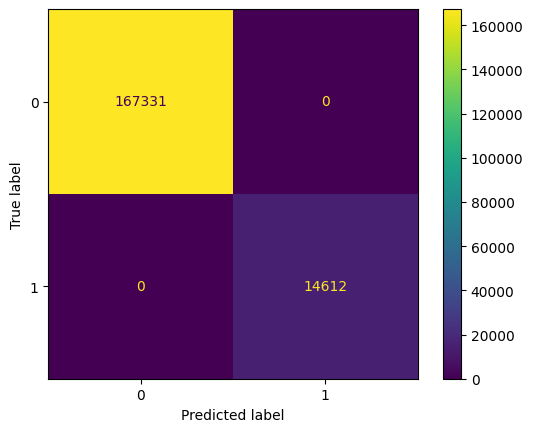

In [ ]:
predictions = dt_model.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

## KNN

              precision    recall  f1-score   support

           0       0.95      0.46      0.62    111512
           1       0.10      0.71      0.18      9784

    accuracy                           0.48    121296
   macro avg       0.52      0.58      0.40    121296
weighted avg       0.88      0.48      0.58    121296

ROC AUC: 0.6100349302961033


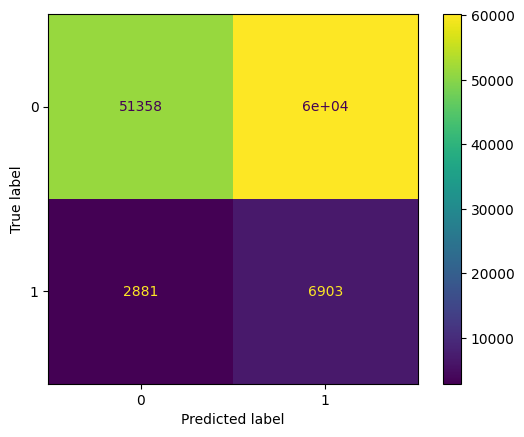

In [ ]:
knn_model  = KNeighborsClassifier().fit(x_over, y_over)
predictions = knn_model.predict(x_test)

#print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

# Calculate ROC AUC
y_scores = knn_model.predict_proba(x_test)[:, 1]  # Menggunakan probabilitas kelas positif
roc_auc_knn = roc_auc_score(y_test, y_scores)

# Print ROC AUC
print("ROC AUC:", roc_auc_knn)

In [ ]:
# Perform cross-validation and calculate ROC AUC
cv_roc_auc_knn = cross_val_score(knn_model, x, y, cv=5, scoring='roc_auc')

# Print cross-validated ROC AUC scores
print("Cross-Validated ROC AUC Scores:", cv_roc_auc_knn)
print("Average Cross-Validated ROC AUC Scores: {:.2f}".format(np.mean(cv_roc_auc_knn)))

Cross-Validated ROC AUC Scores: [0.58955355 0.58832464 0.59014812 0.58859345 0.5905525 ]
Average Cross-Validated ROC AUC Scores: 0.59


              precision    recall  f1-score   support

           0       1.00      0.58      0.73    167331
           1       0.17      1.00      0.29     14612

    accuracy                           0.61    181943
   macro avg       0.59      0.79      0.51    181943
weighted avg       0.93      0.61      0.70    181943



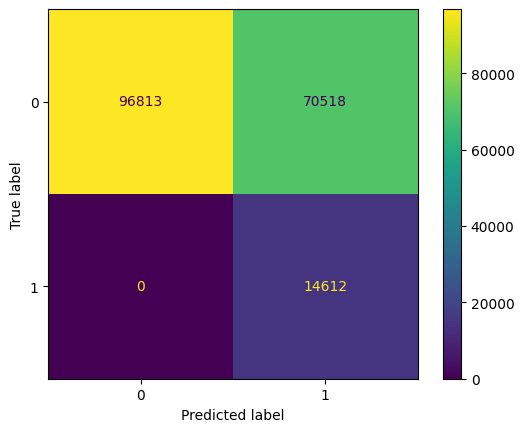

In [ ]:
predictions = knn_model.predict(x_train)

#print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

#Model Selection

In [ ]:
results = pd.DataFrame([["Logistic Regression", roc_auc_lr1, np.mean(cv_roc_auc_lr1)],["XGBoost", roc_auc_xgb, np.mean(cv_roc_auc_xgb)],
                       ["Random Forest", roc_auc_rf, np.mean(cv_roc_auc_rf)],["Decision Tree", roc_auc_dt, np.mean(cv_roc_auc_dt)],
                       ["K-Nearest Neighbor", roc_auc_knn, np.mean(cv_roc_auc_knn)]],
                        columns = ["Models", "ROC-AUC Score Before Cross-Val", "ROC-AUC Score After Cross-Val"])

results.sort_values(by=["ROC-AUC Score Before Cross-Val", "ROC-AUC Score After Cross-Val"], ascending=False)

,Models,ROC-AUC Score Before Cross-Val,ROC-AUC Score After Cross-Val
1,XGBoost,0.719571,0.744764
0,Logistic Regression,0.719090,0.740967
2,Random Forest,0.698354,0.713166
4,K-Nearest Neighbor,0.610035,0.589434
3,Decision Tree,0.540070,0.535386


Model terbaik untuk memprediksi nasabah yang gagal membayar pinjaman pada data Home Credit adalah model XGBoost.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
best_model.fit(x_over, y_over)

y_pred = best_model.predict(x_test)

#Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC Score: {:.2f}".format(roc_auc))

Accuracy: 0.92
Precision: 0.40
Recall: 0.04
F1 Score: 0.07
ROC AUC Score: 0.52


In [ ]:
metrics = [[accuracy, precision, recall, f1, roc_auc]]
data_metrics = pd.DataFrame(metrics, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])
data_metrics.head()

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,0.917854,0.401961,0.037715,0.068959,0.516396


In [ ]:
data_metrics.to_csv('evaluation metrics.csv', index=False)

#Feature Importance

Terdapat 2 metode yang umum digunakan untuk menentukan feature importance dari model XGBoost, yaitu berdasarkan frekuensi pemisahan (gain) dan berdasarkan penurunan impurity (weight).

In [ ]:
# Menghitung feature importance menggunakan gain
importance_gain = best_model.get_booster().get_score(importance_type='gain')

# Menghitung feature importance menggunakan weight
importance_weight = best_model.get_booster().get_score(importance_type='weight')

# Mengurutkan skor kepentingan fitur menggunakan gain
sorted_importance_gain = sorted(importance_gain.items(), key=lambda x: x[1], reverse=True)

# Menampilkan top 10 feature importance menggunakan gain
print("\nTop 10 Feature Importance using Gain:")
for feature, score in sorted_importance_gain[:10]:
    print("{}: {:.3f}".format(feature, score))

sorted_importance_weight = sorted(importance_weight.items(), key=lambda x: x[1], reverse=True)

# Menampilkan top 10 feature importance menggunakan weight
print("\nTop 10 Feature Importance using Weight:")
for feature, score in sorted_importance_weight[:10]:
    print("{}: {}".format(feature, score))


Top 10 Feature Importance using Gain:
WEEKDAY_APPR_PROCESS_START_SATURDAY: 2100.502
WEEKDAY_APPR_PROCESS_START_WEDNESDAY: 1209.696
NAME_TYPE_SUITE_Spouse, partner: 1120.575
WEEKDAY_APPR_PROCESS_START_FRIDAY: 1009.747
WEEKDAY_APPR_PROCESS_START_THURSDAY: 1006.400
WEEKDAY_APPR_PROCESS_START_SUNDAY: 821.239
WEEKDAY_APPR_PROCESS_START_TUESDAY: 793.849
NAME_EDUCATION_TYPE_Higher education: 746.040
NAME_EDUCATION_TYPE_Incomplete higher: 625.355
NAME_TYPE_SUITE_Children: 568.950

Top 10 Feature Importance using Weight:
EXT_SOURCE_2: 350.0
EXT_SOURCE_3: 348.0
HOUR_APPR_PROCESS_START: 244.0
DAYS_BIRTH: 234.0
AMT_INCOME_TOTAL: 225.0
DAYS_ID_PUBLISH: 224.0
AMT_ANNUITY: 204.0
DAYS_LAST_PHONE_CHANGE: 200.0
DAYS_REGISTRATION: 198.0
AMT_REQ_CREDIT_BUREAU_YEAR: 195.0


In [ ]:
# Membuat DataFrame
x_importance = {'Feature': [item[0] for item in sorted_importance_weight],
                'Importance': [item[1] for item in sorted_importance_weight]}

importance = pd.DataFrame(x_importance)

importance.to_csv('importance.csv', index=False)